In [277]:
%matplotlib inline
# imports the necessary python modules
import folium
import pandas as pd
import numpy as np
import os

# obtains the machine username for cleaner file paths
user = os.environ["HOME"]

In [274]:
# community_health data
food_venues = pd.read_csv(user+"/Documents/DataOpen/data/food_venues.csv", encoding = "ISO-8859-1")

# filters the data for NY state
food_venues = food_venues.loc[food_venues['state'] == "NY"]

# filters for nyc
food_venues = food_venues.loc[food_venues['city'] == "New York City"]

food_venues.head()

,business_name,street_address,city,state,country,latitude,longitude,categories,type
399827,Azul on the Rooftop,525 greenwich Street,New York City,NY,United States,40.726400,-74.008890,"Bar, Pub",restaurant
399829,The Halal Guys,6th Avenue At 53rd,New York City,NY,United States,40.761795,-73.979164,"Middle Eastern, Fast Food, Vegetarian Friendly...",restaurant
399831,Burly Coffee,356 Throop Avenue,New York City,NY,United States,40.691970,-73.942920,Cafe,restaurant
399832,Del Bove,878 Lexington Ave,New York City,NY,United States,40.766300,-73.965220,Delicatessen,restaurant
399833,Venice Restaurant,2107 Williamsbridge Road,New York City,NY,United States,40.855720,-73.855510,American,restaurant


In [275]:
# filters the data for the top 11 fast food restaurant chains
food_venues_subway = food_venues[food_venues["business_name"].str.contains("Subway")]
food_venues_subway.loc[food_venues_subway['business_name'].str.contains('Subway'), 'business_name'] = 'Subway'

food_venues_mcdonalds = food_venues[food_venues["business_name"].str.contains("McDonalds")]
food_venues_mcdonalds.loc[food_venues_mcdonalds['business_name'].str.contains('McDonalds'), 'business_name'] = 'McDonalds'

food_venues_starbucks = food_venues[food_venues["business_name"].str.contains("Starbucks")]
food_venues_starbucks.loc[food_venues_starbucks['business_name'].str.contains('Starbucks'), 'business_name'] = 'Starbucks'

food_venues_kfc = food_venues[food_venues["business_name"].str.contains("KFC")]
food_venues_kfc.loc[food_venues_kfc['business_name'].str.contains('KFC'), 'business_name'] = 'KFC'

food_venues_burgerking = food_venues[food_venues["business_name"].str.contains("Burger King")]
food_venues_burgerking.loc[food_venues_burgerking['business_name'].str.contains('Burger King'), 'business_name'] = 'Burger King'

food_venues_pizzahut = food_venues[food_venues["business_name"].str.contains("Pizza Hut")]
food_venues_pizzahut.loc[food_venues_pizzahut['business_name'].str.contains('Pizza Hut'), 'business_name'] = 'Pizza Hut'

food_venues_dominoes = food_venues[food_venues["business_name"].str.contains("Dominoes")]
food_venues_dominoes.loc[food_venues_dominoes['business_name'].str.contains('Dominoes'), 'business_name'] = 'Dominoes'

food_venues_dunkindoughnuts = food_venues[food_venues["business_name"].str.contains("Dunkin Doughnuts")]
food_venues_dunkindoughnuts.loc[food_venues_dunkindoughnuts['business_name'].str.contains('Dunkin Doughnuts'), 'business_name'] = 'Dunkin Doughnuts'

food_venues_baskinrobbins = food_venues[food_venues["business_name"].str.contains("Baskin-Robbins")]
food_venues_baskinrobbins.loc[food_venues_baskinrobbins['business_name'].str.contains('Baskin-Robbins'), 'business_name'] = 'Baskin-Robbins'

food_venues_huntbrotherspizza = food_venues[food_venues["business_name"].str.contains("Hunt Brothers Pizza")]
food_venues_huntbrotherspizza.loc[food_venues_huntbrotherspizza['business_name'].str.contains('Hunt Brothers Pizza'), 'business_name'] = 'Hunt Brothers Pizza'

food_venues_tacobell = food_venues[food_venues["business_name"].str.contains("Taco Bell")]
food_venues_tacobell.loc[food_venues_tacobell['business_name'].str.contains('Taco Bell'), 'business_name'] = 'Taco Bell'

# 
food_venues_top10 = pd.concat([food_venues_subway, food_venues_mcdonalds, food_venues_starbucks,
                               food_venues_kfc, food_venues_burgerking, food_venues_pizzahut,
                              food_venues_dominoes, food_venues_dunkindoughnuts, food_venues_baskinrobbins,
                            food_venues_huntbrotherspizza, food_venues_tacobell])

# resets the index
food_venues_top10 = food_venues_top10.reset_index(drop=True)

food_venues_top10.head()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,business_name,street_address,city,state,country,latitude,longitude,categories,type
0,Subway,455 W 34th St,New York City,NY,United States,40.75447,-73.99844,American,restaurant
1,Subway,367 W 34th St,New York City,NY,United States,40.75336,-73.99584,Fast Food,restaurant
2,Subway,2 W 35th St Frnt 1,New York City,NY,United States,40.74919,-73.98452,Fast Food,restaurant
3,Subway,224 W 35th St,New York City,NY,United States,40.75202,-73.99121,American,restaurant
4,Subway,100 W 33rd St,New York City,NY,United States,40.74933,-73.98813,American,restaurant


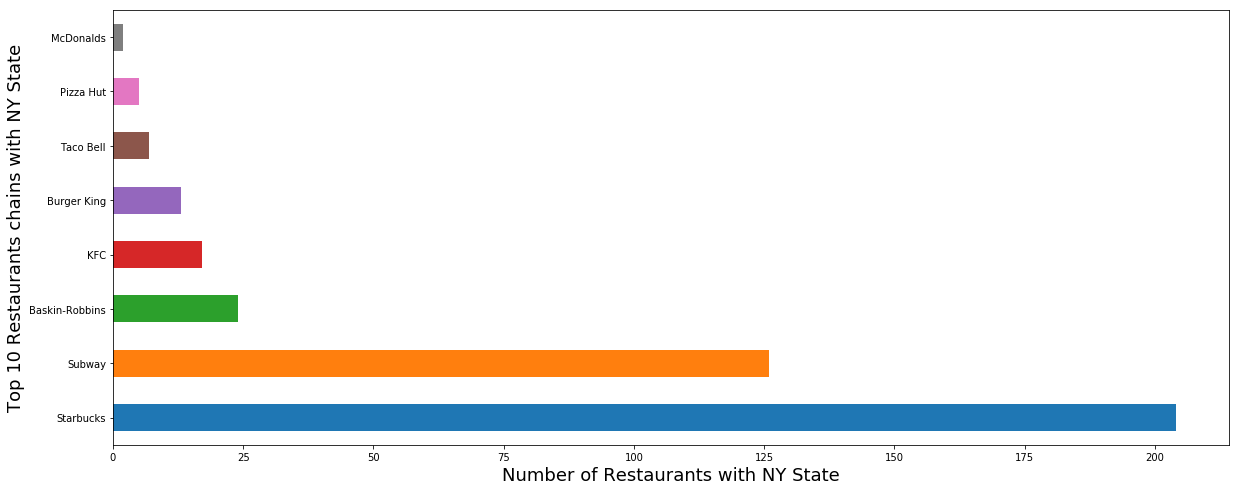

In [342]:
# cou
chart1 = food_venues_top10['business_name'].value_counts()[:40].plot(kind='barh', figsize=(20, 8))


# ax = data['region'].value_counts().plot(kind='barh', figsize=(10,7),
#                                         color="coral", fontsize=13);
# ax.set_alpha(0.8)
chart1.set_xlabel("Number of Restaurants with NY State", fontsize=18);
chart1.set_ylabel("Top 10 Restaurants chains with NY State", fontsize=18);

In [361]:
location = [40.5806, -73.7320]

# colors = {'McDonalds' : 'Red', 'Pizza Hut' : 'Blue', 'Taco Bell' : 'Green'
#          'Burger King' : 'Brown', 'KFC' : 'Yellow',
#           'Baskin-Robbins' : 'Orange',
#           'Subway': 'Purple',
#           'Starbucks': 'White'}

map1 = folium.Map(location=location, zoom_start=11)


food_venues_top10.apply(lambda row:folium.CircleMarker(location=[row["latitude"],
                                                           row["longitude"]],
                                                 radius=8, 
#                                                  fill_color=colors[row['business_name']
                                                       ).add_to(map1),
     axis=1)

map1

In [335]:
# geographic data
geographic = pd.read_csv(user+"/Documents/DataOpen/data/geographic.csv")

geographic = geographic.dropna()

In [336]:
# transpose dataframe
geographic_transposed = geographic.T

geographic_transposed.head()

,0,1,2,3,4,5,6,7,8,9
BK88,-73.976051,40.631284,-73.977167,40.630755,-73.977000,40.629880,-73.976851,40.629097,-73.976697,40.628363
QN52,-73.794934,40.757806,-73.794749,40.755636,-73.794579,40.753571,-73.794629,40.752711,-73.794657,40.751996
QN48,-73.775740,40.743334,-73.775799,40.743326,-73.778060,40.742995,-73.778601,40.742916,-73.779658,40.742738
QN51,-73.803792,40.775618,-73.800991,40.775397,-73.798653,40.775209,-73.798531,40.775199,-73.798234,40.774857
QN27,-73.861099,40.763673,-73.859931,40.762209,-73.859668,40.761910,-73.859137,40.761427,-73.859125,40.761284


In [337]:
geographic_transposed.columns = ['Long1', 'Lat1','Long2', 'Lat2','Long3', 'Lat3', 'Long4', 'Lat4', 'Long5', 'Lat5']

# renamed the columns
geographic_transposed.head()

,Long1,Lat1,Long2,Lat2,Long3,Lat3,Long4,Lat4,Long5,Lat5
BK88,-73.976051,40.631284,-73.977167,40.630755,-73.977000,40.629880,-73.976851,40.629097,-73.976697,40.628363
QN52,-73.794934,40.757806,-73.794749,40.755636,-73.794579,40.753571,-73.794629,40.752711,-73.794657,40.751996
QN48,-73.775740,40.743334,-73.775799,40.743326,-73.778060,40.742995,-73.778601,40.742916,-73.779658,40.742738
QN51,-73.803792,40.775618,-73.800991,40.775397,-73.798653,40.775209,-73.798531,40.775199,-73.798234,40.774857
QN27,-73.861099,40.763673,-73.859931,40.762209,-73.859668,40.761910,-73.859137,40.761427,-73.859125,40.761284


In [338]:
from shapely.geometry import point
from shapely.geometry.polygon import Polygon

#
geographic_polys = geographic_transposed
geographic_polys["geometry"] = geographic_polys.apply(lambda row: Point(row["Long1"], 
                                                                        row["Lat1"],
                                                                        row["Long2"], 
                                                                        row["Lat2"],
                                                                        row["Long3"], 
                                                                        row["Lat3"],
                                                                        row["Long4"], 
                                                                        row["Lat4"],
                                                                        row["Long5"], 
                                                                        row["Lat5"])
                                                      , axis=1)


#del(places["latitude"], places["longitude"])

In [339]:
# makes polys
geographic_polys = geographic_polys[['geometry']]

geographic_polys.head()

,geometry
BK88,POINT Z (-73.9760507905698 40.6312841471042 0)
QN52,POINT Z (-73.79493384594591 40.7578063026709 0)
QN48,POINT Z (-73.7757397458527 40.7433339175923 0)
QN51,POINT Z (-73.8037916164017 40.7756183875692 0)
QN27,POINT Z (-73.86109864852619 40.7636727485249 0)


In [340]:
geographic_polys['nta_code'] = geographic_polys.index

geographic_polys.head()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,geometry,nta_code
BK88,POINT Z (-73.9760507905698 40.6312841471042 0),BK88
QN52,POINT Z (-73.79493384594591 40.7578063026709 0),QN52
QN48,POINT Z (-73.7757397458527 40.7433339175923 0),QN48
QN51,POINT Z (-73.8037916164017 40.7756183875692 0),QN51
QN27,POINT Z (-73.86109864852619 40.7636727485249 0),QN27


In [341]:
#
geo_demographics = pd.merge(geographic_polys, demographics_city, on='nta_code')

geo_demographics

,geometry,nta_code,nta_name,borough,population,under_5_years,5-9_years,10-14_years,15-19_years,20-24_years,...,15000_to_24999,25000_to_34999,35000_to_49999,50000_to_74999,75000_to_99999,100000_to_149999,150000_to_199999,200000_or_more,median_income,mean_income
0,POINT Z (-73.9760507905698 40.6312841471042 0),BK88,Borough Park,Brooklyn,106357,14703,11971,10024,9094,8640,...,4893,3850,3711,4098,2136,2486,1043,783,35754,55689
1,POINT Z (-73.79493384594591 40.7578063026709 0),QN52,East Flushing,Queens,26982,1350,1318,1281,1602,2048,...,853,739,1151,1329,1080,1386,425,316,55971,70852
2,POINT Z (-73.7757397458527 40.7433339175923 0),QN48,Auburndale,Queens,19996,917,966,1063,1168,1214,...,445,632,690,1417,1060,1237,589,433,70772,84402
3,POINT Z (-73.8037916164017 40.7756183875692 0),QN51,Murray Hill,Queens,51739,2539,2295,2254,2743,3236,...,1665,2443,2151,2850,2140,2233,1031,906,52696,71925
4,POINT Z (-73.86109864852619 40.7636727485249 0),QN27,East Elmhurst,Queens,23150,1621,1479,1431,1816,1944,...,617,730,1004,1173,860,766,295,128,51594,66284
5,POINT Z (-73.8969673117969 40.8343504299065 0),BX35,Morrisania-Melrose,Bronx,37865,3180,3155,3258,3560,3173,...,2341,1456,2044,1544,785,654,147,84,26339,39412
6,POINT Z (-73.75725808423579 40.7181468677945 0),QN07,Hollis,Queens,20269,1160,1154,1319,1567,1672,...,561,559,723,1204,655,1086,492,223,59368,75975
7,POINT Z (-73.94607972264009 40.8212714957943 0),MN06,Manhattanville,Manhattan,22950,1334,1394,1505,1863,2247,...,943,918,1303,917,599,421,168,79,29182,40748
8,POINT Z (-73.76031600755501 40.67511822896029 0),QN02,Springfield Gardens North,Queens,25409,1422,1414,1542,1797,1656,...,1215,1120,1526,1879,1551,1260,446,146,51341,61997
9,POINT Z (-73.7677958823845 40.7787538471015 0),QN46,Bayside-Bayside Hills,Queens,43808,2106,2199,2353,2694,2504,...,1284,1073,1680,2506,2360,3047,1710,1276,79120,94806


In [333]:
# food_establishment_inspections data
demographics_city = pd.read_csv(user+"/Documents/DataOpen/data/demographics_city.csv")

demographics_city.head()

,nta_name,borough,nta_code,population,under_5_years,5-9_years,10-14_years,15-19_years,20-24_years,25-29_years,...,15000_to_24999,25000_to_34999,35000_to_49999,50000_to_74999,75000_to_99999,100000_to_149999,150000_to_199999,200000_or_more,median_income,mean_income
0,Allerton-Pelham Gardens,Bronx,BX31,28903,1679,1706,1763,2039,1964,1703,...,797,773,1160,1764,1155,1562,765,427,61638,78489
1,Annadale-Huguenot-Prince's Bay-Eltingville,Staten Island,SI01,27770,1397,1698,1817,1880,1720,1594,...,571,405,1008,1523,1346,2075,1086,1151,88288,109187
2,Arden Heights,Staten Island,SI48,25238,1507,1540,1596,1752,1614,1561,...,337,516,707,1421,1611,2021,1047,740,89570,101627
3,Astoria,Queens,QN70,78793,3480,3037,3060,3392,6630,11586,...,3673,2816,4725,6463,4557,4698,1627,1197,54882,70094
4,Auburndale,Queens,QN48,19996,917,966,1063,1168,1214,1307,...,445,632,690,1417,1060,1237,589,433,70772,84402


In [351]:
demographics_city = demographics_city[['nta_name', 'borough', 'nta_code', 'population', 'mean_income']]

#
demographics_city = demographics_city.sort_values(['mean_income'])

demographics_city_bottom = demographics_city.head(5)

demographics_city_top = demographics_city.tail(5)

demographics_city_bottom

,nta_name,borough,nta_code,population,mean_income
32,Claremont-Bathgate,Bronx,BX01,31078,29720
110,Mott Haven-Port Morris,Bronx,BX39,52413,31585
13,Belmont,Bronx,BX06,27378,31783
53,East Tremont,Bronx,BX17,43423,32330
85,Hunts Point,Bronx,BX27,27204,32953


In [360]:
demographics_city_bottom.dtypes

nta_name       object
borough        object
nta_code       object
population      int64
mean_income     int64
dtype: object

In [ ]:
# cou
chart2 = food_venues_top10['business_name'].value_counts()[:40].plot(kind='barh', figsize=(20, 8))


# ax.set_alpha(0.8)
chart2.set_xlabel("Mean", fontsize=18);
chart2.set_ylabel("Top 10 Restaurants chains with NY State", fontsize=18);

In [352]:
demographics_city_top

,nta_name,borough,nta_code,population,mean_income
7,Battery Park City-Lower Manhattan,Manhattan,MN25,39699,185275
95,Lincoln Square,Manhattan,MN14,61489,188144
165,Turtle Bay-East Midtown,Manhattan,MN19,51231,196721
148,SoHo-TriBeCa-Civic Center-Little Italy,Manhattan,MN24,42742,235533
167,Upper East Side-Carnegie Hill,Manhattan,MN40,61207,311109
